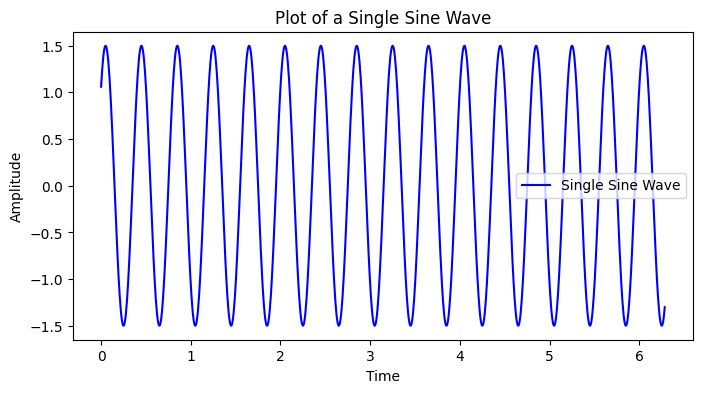

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a sine wave
def generate_sine_wave(amplitude, frequency, phase, time):
    return amplitude * np.sin(2 * np.pi * frequency * time + phase)

# Time values
time = np.linspace(0, 2 * np.pi, 1000)

# Parameters for the single wave
amplitude_single = 1.5
frequency_single = 2.5
phase_single = np.pi / 4

# Generate the single sine wave
single_wave = generate_sine_wave(amplitude_single, frequency_single, phase_single, time)

# Plot the single wave
plt.figure(figsize=(8, 4))
plt.plot(time, single_wave, label='Single Sine Wave', color='blue')
plt.title('Plot of a Single Sine Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


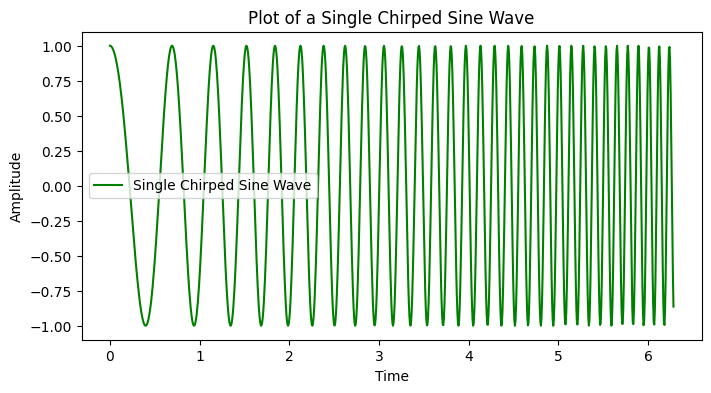

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a chirped sine wave
def generate_chirped_sine_wave(amplitude, start_frequency, end_frequency, phase, time):
    frequency = np.linspace(start_frequency, end_frequency, len(time))
    return amplitude * np.sin(2 * np.pi * frequency * time + phase)

# Time values
time = np.linspace(0, 2 * np.pi, 1000)

# Parameters for the single chirped wave
amplitude_chirped = 1.0
start_frequency_chirped = 1.0
end_frequency_chirped = 5.0
phase_chirped = np.pi / 2

# Generate the single chirped sine wave
chirped_wave = generate_chirped_sine_wave(amplitude_chirped, start_frequency_chirped, end_frequency_chirped, phase_chirped, time)

# Plot the single chirped wave
plt.figure(figsize=(8, 4))
plt.plot(time, chirped_wave, label='Single Chirped Sine Wave', color='green')
plt.title('Plot of a Single Chirped Sine Wave')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


<ipython-input-117-0cdd8d60b017>:7: DeprecationWarning: Importing gaussian from 'scipy.signal' is deprecated and will raise an error in SciPy 1.13.0. Please use 'scipy.signal.windows.gaussian' or the convenience function 'scipy.signal.get_window' instead.
  envelope = gaussian(len(time), std=100)  # Gaussian envelope for the wave packet


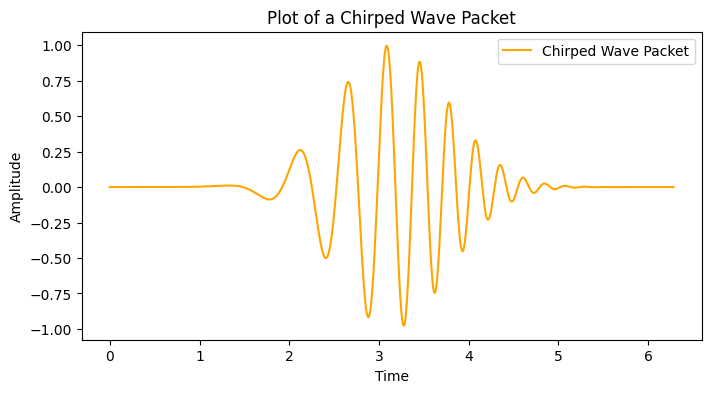

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import gaussian

# Function to generate a chirped wave packet
def generate_chirped_wave_packet(amplitude, center_frequency, bandwidth, chirp_rate, phase, time):
    envelope = gaussian(len(time), std=100)  # Gaussian envelope for the wave packet
    instantaneous_frequency = center_frequency + chirp_rate * (time - time.mean())
    return amplitude * np.sin(2 * np.pi * instantaneous_frequency * time + phase) * envelope

# Time values
time = np.linspace(0, 2 * np.pi, 1000)

# Parameters for the chirped wave packet
amplitude_packet = 1.0
center_frequency_packet = 1.0
bandwidth_packet = 2.0
chirp_rate_packet = 0.5
phase_packet = np.pi / 2

# Generate the chirped wave packet
chirped_packet = generate_chirped_wave_packet(amplitude_packet, center_frequency_packet, bandwidth_packet, chirp_rate_packet, phase_packet, time)

# Plot the chirped wave packet
plt.figure(figsize=(8, 4))
plt.plot(time, chirped_packet, label='Chirped Wave Packet', color='orange')
plt.title('Plot of a Chirped Wave Packet')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.show()


FFT

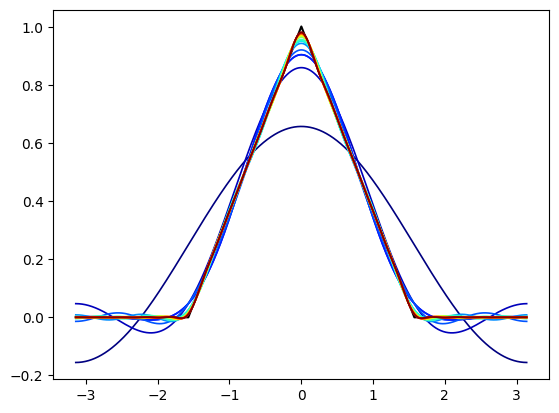

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define domain
dx = 0.001
L = np.pi
x = np.arange(-1 + dx, 1 + dx, dx) * L
n = len(x)
nquart = np.floor(n / 4).astype(int)

# Define hat function
f = np.zeros_like(x)
f[nquart:2 * nquart + 1] = 4 * np.arange(1, nquart + 2) / n
f[2 * nquart + 1:3 * nquart + 1] = 1 - 4 * np.arange(0, nquart) / n

plt.plot(x, f, '-k', linewidth=1.5)


# Compute Fourier series
CC = plt.get_cmap('jet')(np.linspace(0, 1, 20))
A0 = np.sum(f * np.ones_like(x)) * dx
fFS = A0 / 2

for k in range(1, 21):
    A_k = np.sum(f * np.cos(np.pi * k * x / L)) * dx
    B_k = np.sum(f * np.sin(np.pi * k * x / L)) * dx
    fFS = fFS + A_k * np.cos(k * np.pi * x / L) + B_k * np.sin(k * np.pi * x / L)
    plt.plot(x, fFS, '-', color=CC[k - 1], linewidth=1.2)

plt.show()


FFT for Derivatives

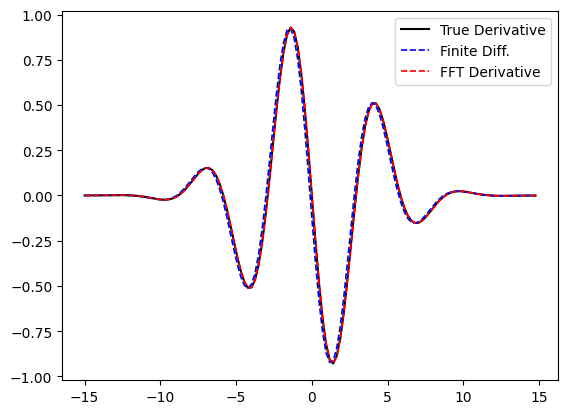

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n = 128
L = 30
dx = L / n

# Create x values
x = np.linspace(-L / 2, L / 2 - dx, n)
f = np.cos(x) * np.exp(-x**2 / 25)  # Function
df = -(np.sin(x) * np.exp(-x**2 / 25) + (2 / 25) * x * f)  # True Derivative

# Approximate derivative using finite difference
dfFD = np.diff(f) / dx
dfFD = np.append(dfFD, dfFD[-1])

# Derivative using FFT (spectral derivative)
fhat = np.fft.fft(f)
kappa = (2 * np.pi / L) * np.fft.fftshift(np.arange(-n / 2, n / 2))
dfhat = 1j * kappa * fhat
dfFFT = np.real(np.fft.ifft(dfhat))

# Plotting commands
plt.plot(x, df, 'k', linewidth=1.5)
plt.plot(x, dfFD, 'b--', linewidth=1.2)
plt.plot(x, dfFFT, 'r--', linewidth=1.2)
plt.legend(['True Derivative', 'Finite Diff.', 'FFT Derivative'])
plt.show()


16 instead of 128 steps

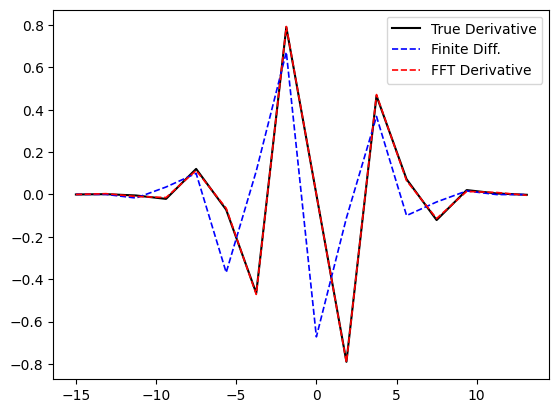

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
n = 16
L = 30
dx = L / n

# Create x values
x = np.linspace(-L / 2, L / 2 - dx, n)
f = np.cos(x) * np.exp(-x**2 / 25)  # Function
df = -(np.sin(x) * np.exp(-x**2 / 25) + (2 / 25) * x * f)  # True Derivative

# Approximate derivative using finite difference
dfFD = np.diff(f) / dx
dfFD = np.append(dfFD, dfFD[-1])

# Derivative using FFT (spectral derivative)
fhat = np.fft.fft(f)
kappa = (2 * np.pi / L) * np.fft.fftshift(np.arange(-n / 2, n / 2))
dfhat = 1j * kappa * fhat
dfFFT = np.real(np.fft.ifft(dfhat))

# Plotting commands
plt.plot(x, df, 'k', linewidth=1.5)
plt.plot(x, dfFD, 'b--', linewidth=1.2)
plt.plot(x, dfFFT, 'r--', linewidth=1.2)
plt.legend(['True Derivative', 'Finite Diff.', 'FFT Derivative'])
plt.show()


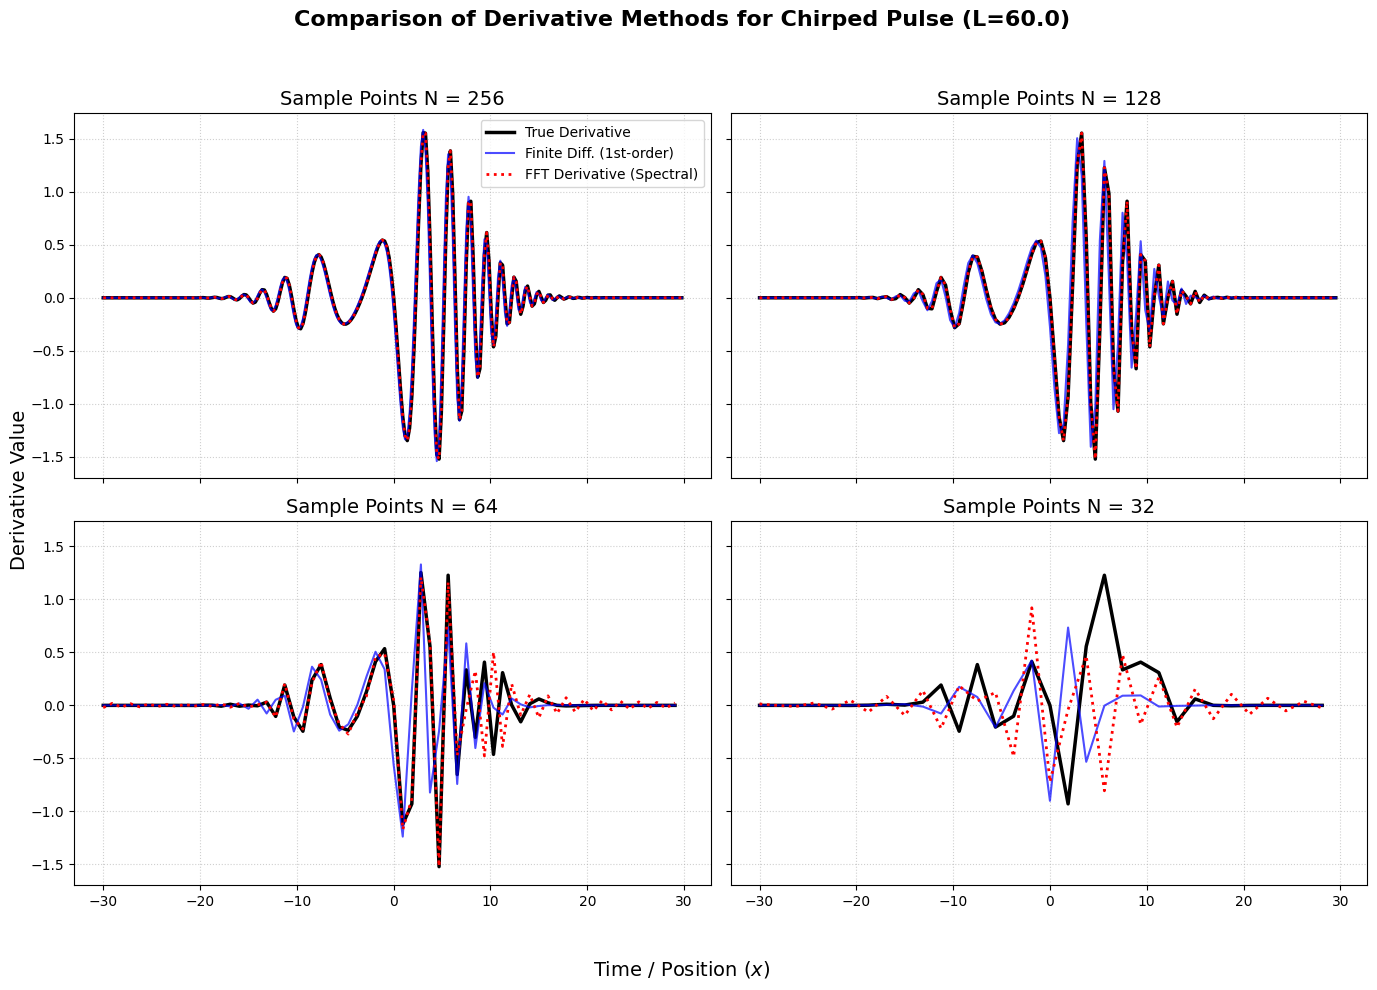

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define Common Parameters and Functions ---
L = 60.0 # Total duration/period
N_values = [256, 128, 64, 32] # Sample points for the 2x2 plot

# Chirp Pulse Parameters (constant)
A = 1.0
f0 = 1.0
beta = 0.3
sigma = 5.0

def chirped_pulse_function(x):
    """The chirped pulse function f(x)."""
    x_s = x
    return A * np.exp(-x_s**2 / (2 * sigma**2)) * np.cos(f0 * x_s + 0.5 * beta * x_s**2)

def chirped_pulse_derivative_true(x):
    """The analytical true derivative df/dx."""
    x_s = x
    E = np.exp(-x_s**2 / (2 * sigma**2))
    P = np.cos(f0 * x_s + 0.5 * beta * x_s**2)
    S = np.sin(f0 * x_s + 0.5 * beta * x_s**2)

    # E' * P term: E * (-x / sigma^2) * P
    term1 = E * (-x_s / sigma**2) * P
    # E * P' term: E * [-S * (f0 + beta*x)]
    term2 = E * (-S * (f0 + beta * x_s))

    return A * (term1 + term2)

# --- 2. Iteration and 2x2 Plotting ---

# Create a 2x2 figure
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharex=True, sharey=True)
# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, N in enumerate(N_values):
    dx = L / N
    ax = axes[i]

    # Create x values for the current N
    x = np.linspace(-L / 2, L / 2 - dx, N)

    # Calculate Function and True Derivative
    f = chirped_pulse_function(x)
    df_true = chirped_pulse_derivative_true(x)

    # A. Finite Difference (FD) Derivative (using a first-order forward difference)
    dfFD = np.diff(f) / dx
    # Pad the last point to match array size N
    dfFD = np.append(dfFD, dfFD[-1])

    # B. FFT (Spectral) Derivative Calculation
    fhat = np.fft.fft(f)
    # Use raw string for cleaner LaTeX frequency label
    kappa = 2 * np.pi * np.fft.fftfreq(N, d=dx)
    dfhat = 1j * kappa * fhat
    dfFFT = np.real(np.fft.ifft(dfhat))

    # Plotting on the current subplot
    ax.plot(x, df_true, 'k', linewidth=2.5, label='True Derivative')
    ax.plot(x, dfFD, 'b-', linewidth=1.5, alpha=0.7, label='Finite Diff. (1st-order)') # Solid blue line for clarity
    ax.plot(x, dfFFT, 'r:', linewidth=2.0, label='FFT Derivative (Spectral)')

    ax.set_title(f'Sample Points N = {N}', fontsize=14)
    ax.grid(True, linestyle=':', alpha=0.6)

    # Add a legend only to the first subplot
    if i == 0:
        ax.legend(loc='upper right', fontsize=10)

# Set common labels
# Use raw strings to avoid the 'invalid escape sequence' warning for \D and \x
fig.supxlabel(r'Time / Position ($x$)', fontsize=14)
fig.supylabel('Derivative Value', fontsize=14)
fig.suptitle('Comparison of Derivative Methods for Chirped Pulse (L=60.0)', fontsize=16, fontweight='bold')

plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Adjust layout to make room for suptitle
plt.show()


## Gibbs phenomena

Gibbs phenomena is characterized by high-frequency oscillations near discontinuities. The black curve is discontinuous, and the red curve is the Fourier approximation.


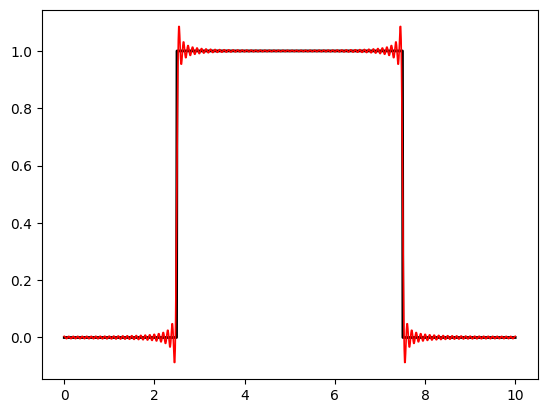

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
dx = 0.01
L = 10

# Create x values
x = np.arange(0, L + dx, dx)
n = len(x)
nquart = np.floor(n / 4).astype(int)

# Define step function
f = np.zeros_like(x)
f[nquart:3 * nquart + 1] = 1

# Compute Fourier series
A0 = np.sum(f * np.ones_like(x)) * dx * 2 / L
fFS = A0 / 2

for k in range(1, 101):
    Ak = np.sum(f * np.cos(2 * np.pi * k * x / L)) * dx * 2 / L
    Bk = np.sum(f * np.sin(2 * np.pi * k * x / L)) * dx * 2 / L
    fFS = fFS + Ak * np.cos(2 * k * np.pi * x / L) + Bk * np.sin(2 * k * np.pi * x / L)

# Plotting
plt.plot(x, f, 'k', linewidth=2)
plt.plot(x, fFS, 'r-', linewidth=1.2)
plt.show()
